# ===============================================================

# False Positives Problem for PLATO space mission.
## Light-curve only 

## Fernando Gutiérrez-Canales
## LESIA, l'Obsevatoire de Paris
### June 22, 2022
### July 8, 2022
# ===============================================================

## In this notebook we are going to calculate several things. The first thing is the aperture size for the nominal mask of the target and for the contaminant. Therefore, we have to follow the code I already created for obtaining the aperture size. However, I believe that I can improve it, but we will go back at that later. 

In [1]:
#First, let's import the main libraries
from IPython.display import Image
import numpy as np
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

%matplotlib inline

## First we have to obtain the flux per pixel of the imagette. Of course, the flux per pixel of the imagette depends on the PSF. Threrefore, it will be useful to know what kind of PSF we are dealing with. Let's use astropy for visualizing it

In [2]:
from astropy.utils.data import get_pkg_data_filename

image_file = get_pkg_data_filename('6000-14047-280196.fits')

In [3]:
fits.info(image_file)

Filename: 6000-14047-280196.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   (1024, 1024)   float64   


In [4]:
#image_data = fits.getdata(image_file, ext=0)

In [5]:
image_data = fits.getdata(image_file)

## Let's plot the PSF using a cool color map

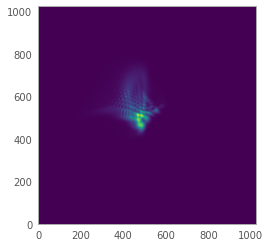

In [6]:
plt.figure()
plt.imshow(image_data, cmap='viridis')
plt.ylim(0,1024)
plt.grid(False)
#plt.colorbar()

## Let's plot the corresponding imagettes for the target and for the contaminant

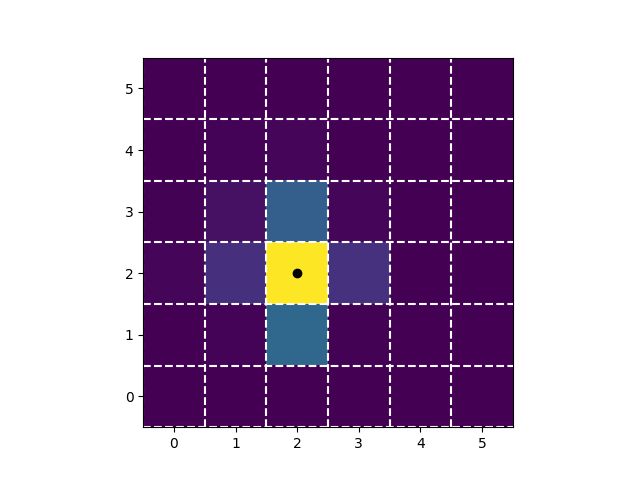

In [7]:
Image(filename='imagette-target.png') 

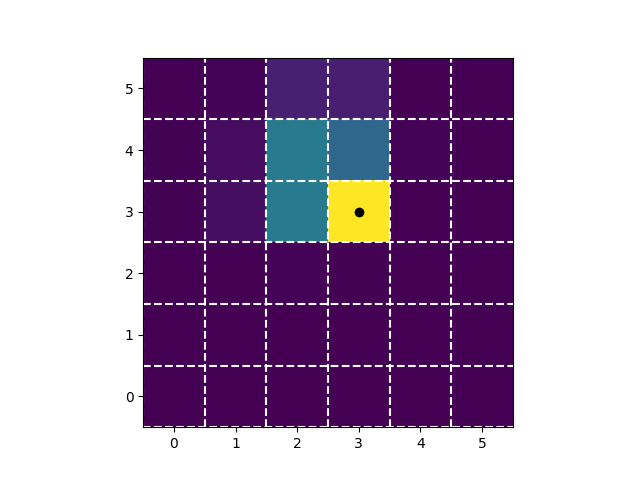

In [8]:
Image(filename='imagette-contaminant.png') 

## This PSF comes from the biruni3 workstation. This PSF has an angular position, $\alpha$, of $\alpha = 14^{\circ}$. Let's remember that angular positions range from $\alpha = 0^{\circ}$ (centre) to $\alpha = 18.9^{\circ}$ (edge) of the camera field of view. Now, in order to obtain the flux per pixel of the imagette of the target star, we have to know the magnitude of the target star. Let's assume the same magnitude:

## P = 11.16

## The flux, in units of $\frac{e^{-}}{s}$ for 24 cameras for a target with P = 11.16 is:

## f = 137400

## The flux, in units of $\frac{e^{-}}{s}$ for 1 camera for a target with P = 11.1 is:

## f = 5726

## This value can be found in Table 5 of [Marchiori et al. (2019)](https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf):

In [9]:
from IPython.display import IFrame
filepath="https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf"
IFrame(filepath, width=600, height=300)

## We have to multiply this flux value by the ones from the imagette, which were obtained using the code "test6.py". Let's do that:

In [10]:
#Let's create the function for calculating the flux per pixel
def flux_pixel_target(f):
    #_pix_t = 5726*f
    #f_pix_t = 137400*f*21
    f_pix_t = 137400*f
    #f_pix_t = 34500*f
    return f_pix_t

## The code "test6.py" gives the flux per pixel of the target as a matrix, like the following:

In [11]:
#f = [[1.82201907e-04 7.08893857e-04 5.38741385e-04 1.13054410e-04
#  4.55657155e-05 2.02242419e-05]
# [9.63166003e-04 4.36863721e-03 1.64797518e-01 2.89924241e-03
#  7.03515551e-05 3.16968727e-05]
# [8.23952536e-03 6.56999394e-02 4.86640439e-01 6.85273463e-02
#  1.92934051e-04 4.83670433e-05]
# [2.56578682e-03 2.18401448e-02 1.46889077e-01 6.60285636e-03
#  1.07829035e-04 4.36430239e-05]
# [7.26154233e-04 3.81665122e-03 9.28162794e-03 5.79236818e-04
#  4.92558749e-05 1.99461212e-05]
# [1.22924670e-04 3.15069832e-04 3.24281357e-04 9.43811697e-05
#  2.06683375e-05 8.45411150e-06]]

##  The thing is that I don't know how to use numpy to read that matrix, so what I did in the last jupyter notebook and what I do know is to convert the values of the matrix in a python list, and then converting that python list into a numpy array, as the following two lines shows:

In [12]:
f_imagette = (1.82201907e-04, 7.08893857e-04, 5.38741385e-04, 1.13054410e-04, 4.55657155e-05, 2.02242419e-05, 9.63166003e-04, 4.36863721e-03, 1.64797518e-01, 2.89924241e-03,7.03515551e-05, 3.16968727e-05, 8.23952536e-03, 6.56999394e-02, 4.86640439e-01, 6.85273463e-02, 1.92934051e-04, 4.83670433e-05, 2.56578682e-03, 2.18401448e-02, 1.46889077e-01, 6.60285636e-03, 1.07829035e-04, 4.36430239e-05, 7.26154233e-04, 3.81665122e-03, 9.28162794e-03, 5.79236818e-04, 4.92558749e-05, 1.99461212e-05,1.22924670e-04, 3.15069832e-04, 3.24281357e-04, 9.43811697e-05, 2.06683375e-05, 8.45411150e-06)

In [13]:
f = np.array(f_imagette)

In [14]:
#Now let's calculate the flux per pixel of the imagette taking into account the magnitude of the target
f_pix_t = flux_pixel_target(f)

In [15]:
f_pix_t

array([2.50345420e+01, 9.74020160e+01, 7.40230663e+01, 1.55336759e+01,
       6.26072931e+00, 2.77881084e+00, 1.32339009e+02, 6.00250753e+02,
       2.26431790e+04, 3.98355907e+02, 9.66630367e+00, 4.35515031e+00,
       1.13211078e+03, 9.02717167e+03, 6.68643963e+04, 9.41565738e+03,
       2.65091386e+01, 6.64563175e+00, 3.52539109e+02, 3.00083590e+03,
       2.01825592e+04, 9.07232464e+02, 1.48157094e+01, 5.99655148e+00,
       9.97735916e+01, 5.24407878e+02, 1.27529568e+03, 7.95871388e+01,
       6.76775721e+00, 2.74059705e+00, 1.68898497e+01, 4.32905949e+01,
       4.45562585e+01, 1.29679727e+01, 2.83982957e+00, 1.16159492e+00])

In [16]:
type(f_pix_t)

numpy.ndarray

In [17]:
np.where(f_pix_t == 6.68643963e+04)

(array([], dtype=int64),)

In [18]:
#f_pix_t = np.reshape(f_pix_t, (6,6))

TypeError: Invalid shape (36,) for image data

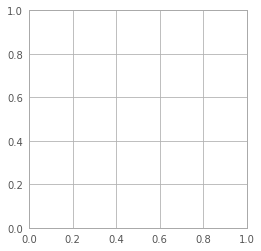

In [19]:
plt.imshow(f_pix_t, origin = 'lower', cmap = 'viridis')
plt.grid(False)

In [ ]:
f_pix_t

In [ ]:
#top = max([len(i) for i in f_pix_t])
#mol = np.asarray([np.pad(i, (0, top-len(i)), 'constant', constant_values=-1) for i in f_pix_t])


## Great,  now we have to follow the instructions of  subsection 4.6.3 of [Marchiori et al. (2019)](https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf). Therefore, we have to:

## 1.- Arrange all the target pixels $n$ from the target imagette in increasing order of $NSR_{n}$:

# $NSR_{n} = \frac{\sqrt{\sigma_{F_{T_{n}}}^{2} + \sum_{k =1}^{N_{c}}  \sigma_{F_{C_{n,k}}}^{2} +  \sigma_{B_{n}}^{2} +   \sigma_{D_{n}}^{2}  +  \sigma_{Q_{n}}^{2}  }}{F_{T_{n}}}$

## 2.- Compute the aggregate noise-to-signal ratio $NSR_{agg}(m)$ as a function of the increasing order of pixels $m = {1,2,,3...36}$, stacking them to conform to the arrangement in the previous step and starting with the pixel owning the smallest $NSR_{n}$:

# $NSR_{agg}(m) = \frac{\sqrt{  \sum_{n=1}^{m}  \left(   \sigma_{F_{T_{n}}}^{2} + \sum_{k =1}^{N_{c}}  \sigma_{F_{C_{n,k}}}^{2} +  \sigma_{B_{n}}^{2} +   \sigma_{D_{n}}^{2}  +  \sigma_{Q_{n}}^{2}    \right)  }}{\sum_{n =1}^{m} F_{T_{n}}}$

## 3.- Define as the aperture the collection of pixels $m$ providing minimum $NSR_{agg}(m)$

## Let's calculate then first $NSR_{n}$ in order to arrange it in increasing order. We know the values of the noises, namely:

# 1. n = 36
# 2. $\sigma^{2}_{B}= 45 e^{-} px ^{-1} s^{-1}$
# 3. $\sigma^{2}_{Q} = 7.2 e^{-} rms px^{-1}$ 
# 4. $ \sigma^{2}_{D} = 50.2 e^{-} px^{-} s^{-1}$
# 5. $\sigma^{2}_{F_{T_{n}}} = F_{T_{n}}$
# 6. $\sigma^{2}_{F_{C_{n,k}}} = F_{C_{n,k}}$

## But, in order to obtain the value of the flux per pixel of the contaminant star we need to know its magnitude, as well as to re-run 'test6.py', but now with the information of the contaminant. Namely, its distance to the target within the imagette domain. With that, we can now $\sigma_{F_{C_{n,k}}}$

## Let's calculate the flux of the contaminant star assuming is 5 magnitudes fainter than the target star. That means: $P_{c} = 16.16$. The flux of the contaminant is given by the following equation:

# $f_{C} = f \times 10^{-0.4 (\Delta m)}$

## where $\Delta m = m_{C} - m_{T} = 16.16 - 11.16 = 5$

In [20]:
#Let's calculate the function for calculating the flux of the contaminant
def flux_contaminant(ft):
    return (ft)*(10**(-0.4*(5)))

## The code "test6.py" gives the flux per pixel of the contaminant as a matrix, like the following:

In [21]:
#f = [[1.60856289e-05 3.23744445e-05 3.65398073e-05 2.79419006e-05
#  1.91250552e-05 1.03936218e-05]
# [5.12425154e-05 1.68465960e-04 2.37235956e-04 1.02844778e-04
#  4.81168627e-05 2.22387211e-05]
# [1.75474645e-04 7.73693179e-04 4.10680200e-03 3.08525392e-03
#  9.64642417e-05 3.81556984e-05]
# [2.45916174e-03 1.52861045e-02 1.66805526e-01 4.06344573e-01
#  8.33414767e-04 6.17109071e-05]
# [1.75771644e-03 1.29182241e-02 1.65846455e-01 1.37426760e-01
#  3.32029364e-03 1.01196192e-04]
# [5.27729806e-04 3.82951937e-03 3.49801844e-02 3.39604057e-02
#  1.25631057e-04 4.30230457e-05]]

## Making it a python list and later a numpy array

In [22]:
fc_imagette = (1.60856289e-05, 3.23744445e-05, 3.65398073e-05, 2.79419006e-05, 1.91250552e-05, 1.03936218e-05, 5.12425154e-05, 1.68465960e-04, 2.37235956e-04, 1.02844778e-04, 4.81168627e-05, 2.22387211e-05, 1.75474645e-04, 7.73693179e-04, 4.10680200e-03, 3.08525392e-03, 9.64642417e-05, 3.81556984e-05, 2.45916174e-03, 1.52861045e-02, 1.66805526e-01, 4.06344573e-01, 8.33414767e-04, 6.17109071e-05, 1.75771644e-03, 1.29182241e-02, 1.65846455e-01, 1.37426760e-01, 3.32029364e-03, 1.01196192e-04, 5.27729806e-04, 3.82951937e-03, 3.49801844e-02, 3.39604057e-02, 1.25631057e-04, 4.30230457e-05)

In [23]:
fc = np.array(fc_imagette)

## Now, let's calculate the flux per pixel of the contaminant:

In [24]:
#Let's calculate the flux of the contaminant
fc_cameras = flux_contaminant(137400)

In [25]:
def flux_pixel_contaminant(fc_cameras):
    return fc*fc_cameras*21

In [26]:
f_pix_c = flux_pixel_contaminant(fc_cameras)

In [27]:
f_pix_c

array([4.64134736e-01, 9.34132222e-01, 1.05431960e+00, 8.06235600e-01,
       5.51834343e-01, 2.99897563e-01, 1.47855154e+00, 4.86091681e+00,
       6.84520627e+00, 2.96748322e+00, 1.38836396e+00, 6.41676059e-01,
       5.06314541e+00, 2.23241430e+01, 1.18497665e+02, 8.90219166e+01,
       2.78337923e+00, 1.10094452e+00, 7.09566528e+01, 4.41065259e+02,
       4.81300665e+03, 1.17246663e+04, 2.40473497e+01, 1.78060651e+00,
       5.07171502e+01, 3.72742438e+02, 4.78533361e+03, 3.96531173e+03,
       9.58037527e+01, 2.91991492e+00, 1.52271158e+01, 1.10496952e+02,
       1.00931824e+03, 9.79893546e+02, 3.62495852e+00, 1.24138696e+00])

In [28]:
#f_pix_c = np.reshape(f_pix_c, (6,6))

TypeError: Invalid shape (36,) for image data

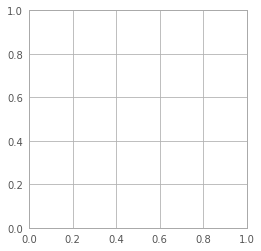

In [29]:
plt.imshow(f_pix_c, cmap = 'viridis', origin = 'lower')
plt.grid(False)

## Excellent, now we are good. We know both target and contaminant's fluxes per pixel in the imagette. We can perform now the calculation of $NSR_{n}$

In [30]:
#Let's compute the NSRn of the target
def nsr(sb,sq,sd,f,fc):
    N = []
    for i in range(0,len(f_pix_t)):
        N.append(np.sqrt(sb**2 + sq**2 + sd**2 + f[i] + fc[i])/f[i])
    return N

## Let's make it a numpy array

In [31]:
NSRn = np.array(nsr(45,7.2,50.2,f_pix_t,f_pix_c))

In [32]:
NSRn

array([2.71577077e+00, 7.03493112e-01, 9.23384043e-01, 4.37248007e+00,
       1.08374780e+01, 2.44072013e+01, 5.19726324e-01, 1.20157840e-01,
       7.28989349e-03, 1.77474394e-01, 7.02251575e+00, 1.55763016e+01,
       6.68870372e-02, 1.29406759e-02, 4.00129189e-03, 1.26119698e-02,
       2.56575566e+00, 1.02108274e+01, 2.00983687e-01, 2.98780918e-02,
       8.52342602e-03, 1.44680055e-01, 4.59554716e+00, 1.13161080e+01,
       6.90575185e-01, 1.41343655e-01, 8.09500221e-02, 1.16804260e+00,
       1.01292856e+01, 2.47544695e+01, 4.02826158e+00, 1.59214921e+00,
       1.68711430e+00, 5.76532474e+00, 2.38915582e+01, 5.83835316e+01])

In [33]:
#NSRn = np.reshape(NSRn, (6,6))

TypeError: Invalid shape (36,) for image data

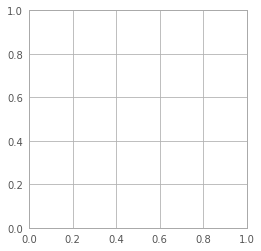

In [34]:
plt.imshow(NSRn, cmap = 'viridis', origin = 'lower')
plt.grid(False)
plt.title('NSR imagette', fontsize = 9)

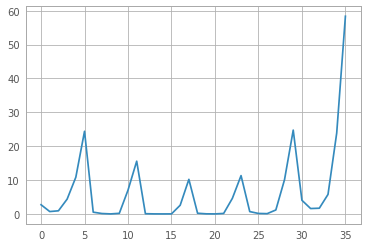

In [35]:
plt.plot(NSRn)

TypeError: Invalid shape (36,) for image data

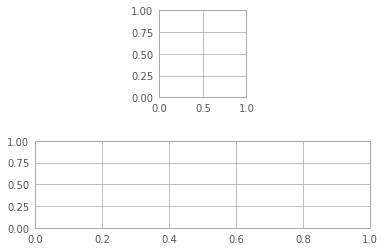

In [36]:
fig, axs = plt.subplots(2,1)
axs[0].imshow(f_pix_t, origin='lower', cmap = 'viridis')
axs[0].grid(False)
axs[0].set_title(f'Target Imagette')
axs[0].set_xticks([0, 1, 2, 3, 4, 5])
axs[0].set_xticklabels([0, 1, 2, 3, 4, 5])
axs[1].imshow(f_pix_c, origin='lower', cmap = 'viridis')
axs[1].grid(False)
axs[1].set_title(f'Contaminant Imagette')
axs[1].set_xticks([0, 1, 2, 3, 4, 5])
axs[1].set_xticklabels([0, 1, 2, 3, 4, 5])
fig.tight_layout()
plt.show()

## Great, now we have to sort $NSR_{n}$ in increasing order:

In [37]:
NSRn = np.sort(NSRn)

In [38]:
NSRn

array([4.00129189e-03, 7.28989349e-03, 8.52342602e-03, 1.26119698e-02,
       1.29406759e-02, 2.98780918e-02, 6.68870372e-02, 8.09500221e-02,
       1.20157840e-01, 1.41343655e-01, 1.44680055e-01, 1.77474394e-01,
       2.00983687e-01, 5.19726324e-01, 6.90575185e-01, 7.03493112e-01,
       9.23384043e-01, 1.16804260e+00, 1.59214921e+00, 1.68711430e+00,
       2.56575566e+00, 2.71577077e+00, 4.02826158e+00, 4.37248007e+00,
       4.59554716e+00, 5.76532474e+00, 7.02251575e+00, 1.01292856e+01,
       1.02108274e+01, 1.08374780e+01, 1.13161080e+01, 1.55763016e+01,
       2.38915582e+01, 2.44072013e+01, 2.47544695e+01, 5.83835316e+01])

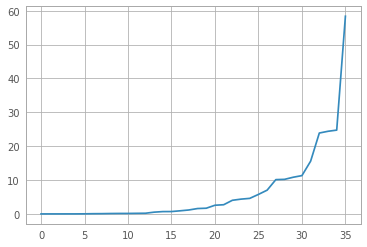

In [39]:
plt.plot(NSRn)

TypeError: Invalid shape (36,) for image data

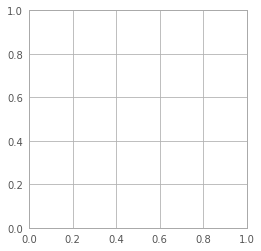

In [40]:
plt.imshow(NSRn, cmap = 'viridis', origin = 'lower')
plt.grid(False)
plt.title('NSR imagette sorted in increasing order', fontsize = 9)

In [41]:
NSRn = np.array([[0.00399800801, 0.00728910269, 0.00779967608, 0.0125725706, 0.0129305871, 0.029048407], [0.0600909455, 0.0668636519, 0.081781839, 0.12011248, 0.136472072, 0.17743829], [0.199574561, 0.519696418, 0.686916852, 0.703457901, 0.859293792, 0.923325718], [1.52908459, 1.57357502, 2.56527614, 2.71577077, 4.02176133, 4.37231794], [4.58401289, 5.23582762, 7.02216962, 10.0261062, 10.2107757, 10.8373748], [11.3149107, 15.5767965, 23.882928, 24.407637, 24.7481004, 58.3775556]])

In [42]:
type(NSRn)

numpy.ndarray

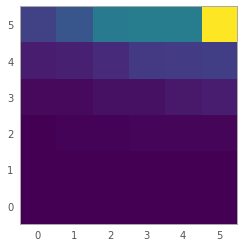

In [43]:
plt.imshow(NSRn, cmap = 'viridis', origin = 'lower')
plt.grid(False)

## Now it is time to compute the aggregate noise-to-signal ratio $NSR_{agg}(m) = \frac{\sqrt{  \sum_{n=1}^{m}  \left(   \sigma_{F_{T_{n}}}^{2} + \sum_{k =1}^{N_{c}}  \sigma_{F_{C_{n,k}}}^{2} +  \sigma_{B_{n}}^{2} +   \sigma_{D_{n}}^{2}  +  \sigma_{Q_{n}}^{2}    \right)  }}{\sum_{n =1}^{m} F_{T_{n}}}$

## We have to sort the flux of the target in decreasing target, since we have to begin $NSR_{agg}$ with the pixel owing the smallest value of $NSR_{n}$. Therefore:

In [44]:
f_pix_t_sorted = np.sort(f_pix_t)[::-1]

In [45]:
f_pix_t_sorted

array([6.68643963e+04, 2.26431790e+04, 2.01825592e+04, 9.41565738e+03,
       9.02717167e+03, 3.00083590e+03, 1.27529568e+03, 1.13211078e+03,
       9.07232464e+02, 6.00250753e+02, 5.24407878e+02, 3.98355907e+02,
       3.52539109e+02, 1.32339009e+02, 9.97735916e+01, 9.74020160e+01,
       7.95871388e+01, 7.40230663e+01, 4.45562585e+01, 4.32905949e+01,
       2.65091386e+01, 2.50345420e+01, 1.68898497e+01, 1.55336759e+01,
       1.48157094e+01, 1.29679727e+01, 9.66630367e+00, 6.76775721e+00,
       6.64563175e+00, 6.26072931e+00, 5.99655148e+00, 4.35515031e+00,
       2.83982957e+00, 2.77881084e+00, 2.74059705e+00, 1.16159492e+00])

In [46]:
f_pix_t

array([2.50345420e+01, 9.74020160e+01, 7.40230663e+01, 1.55336759e+01,
       6.26072931e+00, 2.77881084e+00, 1.32339009e+02, 6.00250753e+02,
       2.26431790e+04, 3.98355907e+02, 9.66630367e+00, 4.35515031e+00,
       1.13211078e+03, 9.02717167e+03, 6.68643963e+04, 9.41565738e+03,
       2.65091386e+01, 6.64563175e+00, 3.52539109e+02, 3.00083590e+03,
       2.01825592e+04, 9.07232464e+02, 1.48157094e+01, 5.99655148e+00,
       9.97735916e+01, 5.24407878e+02, 1.27529568e+03, 7.95871388e+01,
       6.76775721e+00, 2.74059705e+00, 1.68898497e+01, 4.32905949e+01,
       4.45562585e+01, 1.29679727e+01, 2.83982957e+00, 1.16159492e+00])

## We have to start with the pixel owing the smallest value of $NSR_{n}$.  Let's start programming the denominator first

In [47]:
#Let's calculate the denominator of NSR_agg of the target
def denominator_agg(F):
    a = [F[0]]
    b = F[0]
    for i in range(1,len(F)):
        b = b + F[i]
        a.append(b)
    return a

In [48]:
d_nsragg = np.array(denominator_agg(f_pix_t_sorted))

In [49]:
#d_nsragg = np.array(f_pix_t)

In [50]:
d_nsragg

array([ 66864.3963186 ,  89507.5752918 , 109690.1344716 , 119105.79185322,
       128132.96352678, 131133.7994223 , 132409.09510126, 133541.20588572,
       134448.43834958, 135048.68910224, 135573.09697987, 135971.452887  ,
       136323.99199607, 136456.33100488, 136556.10459649, 136653.50661245,
       136733.09375124, 136807.11681754, 136851.67307599, 136894.96367091,
       136921.47280951, 136946.50735154, 136963.39720119, 136978.93087713,
       136993.74658654, 137006.71455925, 137016.38086292, 137023.14862014,
       137029.79425189, 137036.0549812 , 137042.05153268, 137046.40668299,
       137049.24651256, 137052.0253234 , 137054.76592045, 137055.92751537])

In [51]:
#d_nsragg

## Now, let's program the numerator

In [52]:
#Let's calculate the numerator of NSR_agg
def numerator_agg(sb,sq,sd,f,fc):
    c = []
    d = 0
    for i in range(0,len(f_pix_t)):
        d = d + sb**2 + sq*2 + sd**2 + f[i] + fc[i]
        c.append(d)
    return c

In [53]:
n_nsragg = np.array(np.sqrt(numerator_agg(45,7.2,50.2,f_pix_t_sorted,f_pix_c)))

In [54]:
n_nsragg

array([267.25325153, 314.05071813, 351.24194946, 370.60330635,
       388.50221902, 398.11374   , 405.37731092, 412.34351687,
       418.92802912, 425.04511739, 430.98560075, 436.7001553 ,
       442.29409661, 447.59152254, 452.89720942, 458.10669743,
       463.14528687, 468.12190801, 473.08886446, 478.38987189,
       488.11456167, 504.54431536, 509.08284529, 513.55827094,
       518.04157218, 522.79271315, 531.66404885, 539.62781649,
       543.93020665, 548.11375676, 552.27651953, 556.4922696 ,
       561.47595157, 566.38975675, 570.40613786, 574.39098625])

## Now we can make the division

In [55]:
def nsr_agg(n,d):
    return n/d

In [56]:
NSR_agg = nsr_agg(n_nsragg,d_nsragg)

## Now, we have to obtain $NSR_{1h}$, which is:

# $NSR_{1h} = \frac{10^{6}}{12 \sqrt{N_{T}}} NSR_{agg}(m)$

In [57]:
def nsr1h(z,nsr):
    return z*nsr

In [224]:
NSR1h = nsr1h(10**6/(12*np.sqrt(24)),NSR_agg)

In [225]:
min(NSR1h)

51.575775399866494

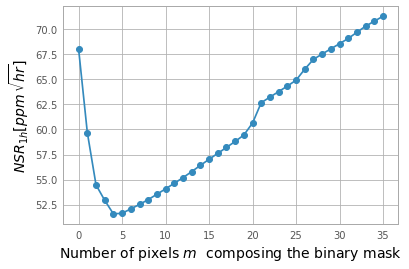

In [226]:
plt.plot(NSR1h, 'o-')
plt.xlabel('Number of pixels $m$  composing the binary mask', fontsize=14)
plt.ylabel('$ NSR_{1h}[ppm \, \sqrt{hr}] $', fontsize = 14)
plt.savefig('binary_mask.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

## Let's compute the statistical significance for the target:

# $\eta = \frac{\delta_{p} \sqrt{t_{d} n_{tr}} (1 - SPR_{T})}{NSR_{1h}}$

In [141]:
def eta(deltap,td,ntr,spr,NSR1h):
    return (deltap*(np.sqrt(td*ntr)*(1-spr)))/NSR1h

In [142]:
eta_t = eta(84,13,3,0,min(NSR1h))

In [143]:
eta_t

5.085525402171883

In [144]:
eta_jupiter = eta(10000.0,29.6,3,0,min(NSR1h))

In [145]:
eta_jupiter

913.5466329349836

## Now, that was for the target. It is time to calculate now the aperture size for the contaminant star. For doing that, we need to change some considerations. Namely, the contaminant is now the target and the target becomes the greatest source of contamination. Therefore, we can use all the functions that I already created, now changing places between target and contaminant

## Let's compute the $NSR_{n}$ of the contaminant, let's call it $NSR_{C_{n}}$:

In [146]:
#Let's compute the NSRn of the contaminant
def nsr_contaminant(sb,sq,sd,fc,f):
    M = []
    for i in range(0,len(f_pix_c)):
        M.append(np.sqrt(sb**2 + sq**2 + sd**2 + fc[i] + f[i])/fc[i])
    return M

## Let's make it a numpy array

In [147]:
NSR_n_c = np.array(nsr_contaminant(45,7.2,50.2,f_pix_c,f_pix_t))

In [148]:
NSR_n_c

array([1.46483493e+02, 7.33532638e+01, 6.48301694e+01, 8.42442189e+01,
       1.22954501e+02, 2.26153873e+02, 4.65185452e+01, 1.48377018e+01,
       2.41141547e+01, 2.38242199e+01, 4.88933536e+01, 1.05718662e+02,
       1.49558289e+01, 5.23279677e+00, 2.25779948e+00, 1.33394102e+00,
       2.44364734e+01, 6.16356206e+01, 9.98561899e-01, 2.03278876e-01,
       3.57415983e-02, 1.11950685e-02, 2.83134284e+00, 3.81092755e+01,
       1.35853782e+00, 1.98855077e-01, 2.15732531e-02, 2.34435966e-02,
       7.15551778e-01, 2.32342475e+01, 4.46812996e+00, 6.23773645e-01,
       7.44775013e-02, 7.62986696e-02, 1.87168910e+01, 5.46308410e+01])

## Great, now we have to sort it in increasing order

In [149]:
NSR_n_c = np.array([[0.0111950685, 0.0215732531, 0.0234435966, 0.0357415983, 0.0744775013, 0.0762986696], [0.198855077, 0.203278876, 0.623773645, 0.715551778, 0.998561899, 1.33394102], [1.35853782, 2.25779948, 2.83134284, 4.46812996, 5.23279677, 14.8377018], [14.9558289, 18.716891, 23.2342475, 23.8242199, 24.1141547, 24.4364734], [38.1092755, 46.5185452, 48.8933536, 54.630841, 61.6356206, 64.8301694], [73.3532638, 84.2442189, 105.718662, 122.954501, 146.483493, 226.153873]])

Text(0.5, 1.0, 'NSR imagette sorted in increasing order')

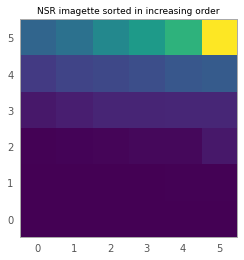

In [150]:
plt.imshow(NSR_n_c, cmap = 'viridis', origin = 'lower')
plt.grid(False)
plt.title('NSR imagette sorted in increasing order', fontsize = 9)

In [151]:
NSR_n_c = np.sort(NSR_n_c)

In [152]:
NSR_n_c

array([[1.11950685e-02, 2.15732531e-02, 2.34435966e-02, 3.57415983e-02,
        7.44775013e-02, 7.62986696e-02],
       [1.98855077e-01, 2.03278876e-01, 6.23773645e-01, 7.15551778e-01,
        9.98561899e-01, 1.33394102e+00],
       [1.35853782e+00, 2.25779948e+00, 2.83134284e+00, 4.46812996e+00,
        5.23279677e+00, 1.48377018e+01],
       [1.49558289e+01, 1.87168910e+01, 2.32342475e+01, 2.38242199e+01,
        2.41141547e+01, 2.44364734e+01],
       [3.81092755e+01, 4.65185452e+01, 4.88933536e+01, 5.46308410e+01,
        6.16356206e+01, 6.48301694e+01],
       [7.33532638e+01, 8.42442189e+01, 1.05718662e+02, 1.22954501e+02,
        1.46483493e+02, 2.26153873e+02]])

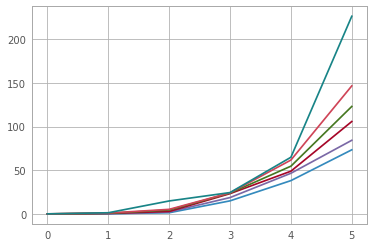

In [153]:
plt.plot(NSR_n_c)

## Now, let's compute the aggregate noise-to-signal ratio. But before that, let's sort the contaminant's flux per pixel in decreasing order

In [154]:
f_pix_c_sorted = np.sort(f_pix_c)[::-1]

In [155]:
f_pix_c_sorted # but it is not exactly as that, I have to fix this later

array([1.17246663e+04, 4.81300665e+03, 4.78533361e+03, 3.96531173e+03,
       1.00931824e+03, 9.79893546e+02, 4.41065259e+02, 3.72742438e+02,
       1.18497665e+02, 1.10496952e+02, 9.58037527e+01, 8.90219166e+01,
       7.09566528e+01, 5.07171502e+01, 2.40473497e+01, 2.23241430e+01,
       1.52271158e+01, 6.84520627e+00, 5.06314541e+00, 4.86091681e+00,
       3.62495852e+00, 2.96748322e+00, 2.91991492e+00, 2.78337923e+00,
       1.78060651e+00, 1.47855154e+00, 1.38836396e+00, 1.24138696e+00,
       1.10094452e+00, 1.05431960e+00, 9.34132222e-01, 8.06235600e-01,
       6.41676059e-01, 5.51834343e-01, 4.64134736e-01, 2.99897563e-01])

In [156]:
f_pix_c

array([4.64134736e-01, 9.34132222e-01, 1.05431960e+00, 8.06235600e-01,
       5.51834343e-01, 2.99897563e-01, 1.47855154e+00, 4.86091681e+00,
       6.84520627e+00, 2.96748322e+00, 1.38836396e+00, 6.41676059e-01,
       5.06314541e+00, 2.23241430e+01, 1.18497665e+02, 8.90219166e+01,
       2.78337923e+00, 1.10094452e+00, 7.09566528e+01, 4.41065259e+02,
       4.81300665e+03, 1.17246663e+04, 2.40473497e+01, 1.78060651e+00,
       5.07171502e+01, 3.72742438e+02, 4.78533361e+03, 3.96531173e+03,
       9.58037527e+01, 2.91991492e+00, 1.52271158e+01, 1.10496952e+02,
       1.00931824e+03, 9.79893546e+02, 3.62495852e+00, 1.24138696e+00])

## Now, I just need to re-write the piece of code of the denominator of the  $NSR_{agg}$, since the numerator is already good. Let's rewrite the denominator stuff   

In [157]:
#Let's calculate the denominator of NSR_agg of the contaminant
def denominator_agg_contaminant(F):
    g = [F[0]]
    h = F[0]
    for i in range(1,len(F)):
        h = h + F[i]
        g.append(h)
    return g

In [158]:
d_nsragg_contaminant = np.array(denominator_agg_contaminant(f_pix_c_sorted))

In [159]:
d_nsragg_contaminant

array([11724.66630934, 16537.67295655, 21323.00656912, 25288.31830216,
       26297.63654283, 27277.5300889 , 27718.59534814, 28091.33778633,
       28209.83545123, 28320.33240314, 28416.13615582, 28505.15807243,
       28576.11472528, 28626.83187544, 28650.87922512, 28673.20336811,
       28688.43048393, 28695.27569021, 28700.33883562, 28705.19975243,
       28708.82471094, 28711.79219417, 28714.71210909, 28717.49548832,
       28719.27609484, 28720.75464637, 28722.14301033, 28723.38439729,
       28724.48534181, 28725.53966141, 28726.47379363, 28727.28002923,
       28727.92170529, 28728.47353964, 28728.93767437, 28729.23757194])

## Now we make the division

In [160]:
NSR_agg_c = nsr_agg(n_nsragg,d_nsragg_contaminant)

## Now we obtain $NSR_{1h}$ for the contaminant, namely, $NSR_{C_{1h}}$

In [227]:
NSR_c_1h = nsr1h(10**6/(12*np.sqrt(24)),NSR_agg_c)

In [228]:
min(NSR_c_1h)

248.26486188945515

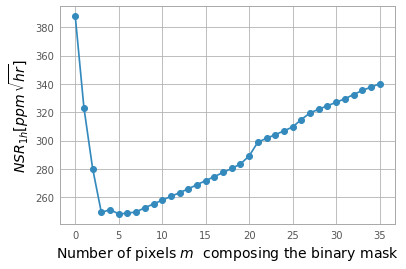

In [229]:
plt.plot(NSR_c_1h, 'o-')
plt.xlabel('Number of pixels $m$  composing the binary mask', fontsize=14)
plt.ylabel('$ NSR_{1h}[ppm \, \sqrt{hr}] $', fontsize = 14)
plt.savefig('binary_mask_contaminant.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

## For this jupyter notebook we are using Marchiori's approach. Namely, two different masks within the imagette domain. One is for the target and the other one is for the contanimiant star. Also, the source of the transit is an eclipsing binary. Therefore, the equations from  [Marchiori et al. (2019)](https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf) will change a little bit.

## We want to obtain $SPR_{c}$ and $SPR_{T}$. Here are the two equations: 

# $SPR_{T} = \frac{\sum_{n} F_{beb_{n}} \times w_{T_{n}}}{\sum_{n} \left( \left( F_{T_{n}} + \sum_{k} F_{c_{k}} + B_{n} \right)  \times w_{T_{n}}  \right) } $


# $SPR_{c} = \frac{ \sum_{n} \left( \left( F_{T_{n}} + \sum_{k} F_{C_{k}} - F_{beb_{n}} \right) \times w_{C_{n}} \right)}{ \sum_{n} \left( \left( F_{T_{n}} + \sum_{k} F_{C_{k}} + B_{n} \right) \times w_{C_{n}}  \right) }$

## Now we can calculate both $SPR_{c}$ and $SPR_{T}$, but there are some considerations that have to be taken into account. For instance, we can make $B_{n} = 0$. Therefore, we can write the expressions as follows:

# $SPR_{T} = \frac{\sum_{n} F_{beb_{n}} \times w_{T_{n}}}{\sum_{n} \left( \left( F_{T_{n}} + \sum_{k} F_{c_{k}} \right)  \times w_{T_{n}}  \right) } $


# $SPR_{c} = \frac{ \sum_{n} \left( \left( F_{T_{n}} + \sum_{k} F_{C_{k}} - F_{beb_{n}} \right) \times w_{C_{n}} \right)}{ \sum_{n} \left( \left( F_{T_{n}} + \sum_{k} F_{C_{k}} \right) \times w_{C_{n}}  \right) }$

## As  [Marchiori et al. (2019)](https://www.aanda.org/articles/aa/pdf/2019/07/aa35269-19.pdf) have pointed out, we can make $N_{c} = 1$, therefore, the expressions becomes: 

# $ SPR_{T} = \frac{\sum_{n=1}^{36} F_{beb_{n}}  \times w_{T_{n}}   }{\sum_{n=1}^{36} \left(  \left( F_{T_{n}} +  F_{c_{n}} \right)  \times w_{T_{n}}  \right)} $

# $ SPR_{c} = \frac{\sum_{n=1}^{36} \left( \left( F_{T_{n}} + F_{c_{n}} - F_{beb_{n}} \right)  \times w_{T_{n}}  \right)}{\sum_{n=1}^{36} \left( \left( F_{T_{n}} + F_{c_{n}} \right) \times w_{T_{n}} \right)}$

In [165]:
class fluxes:
    def __init__(self,f,Ft,Fc):
        self.f  = f
        self.Ft = np.array(f)*5726.
        self.Fc = (5726.*10**(-(0.4*5)))*F

## Now, it is time to calculate both $SPR_{c}$ and $SPR_{T}$. Let's first hit $SPR_{T}$

#  $SPR_{T} = \frac{\sum_{n=1}^{36} F_{beb_{n}}  \times w_{T_{n}}   }{\sum_{n=1}^{36} \left(  \left( F_{T_{n}} +  F_{c_{n}} \right)  \times w_{T_{n}}  \right)} = \frac{\sum_{n=1}^{36} F_{beb_{n}}  \times w_{T_{n}}   }{\sum_{n=1}^{36} \left(  \left( F_{T_{n}} +  F_{beb_{n}} \right)  \times w_{T_{n}}  \right)}  $

## I know that I just have to use the four pixels of the aperture, therefore, it will be useful to have an array for the mask, knowing that there will be zeroes all over the place but for the elements of the mask, that I already now:


In [166]:
B = (6.68643963e+04, 2.26431790e+04, 2.01825592e+04, 9.41565738e+03,
       9.02717167e+03, 3.00083590e+03, 1.27529568e+03, 1.13211078e+03,
       9.07232464e+02, 6.00250753e+02, 5.24407878e+02, 3.98355907e+02,
       3.52539109e+02, 1.32339009e+02, 9.97735916e+01, 9.74020160e+01,
       7.95871388e+01, 7.40230663e+01, 4.45562585e+01, 4.32905949e+01,
       2.65091386e+01, 2.50345420e+01, 1.68898497e+01, 1.55336759e+01,
       1.48157094e+01, 1.29679727e+01, 9.66630367e+00, 6.76775721e+00,
       6.64563175e+00, 6.26072931e+00, 5.99655148e+00, 4.35515031e+00,
       2.83982957e+00, 2.77881084e+00, 2.74059705e+00, 1.16159492e+00)

In [167]:
B = np.array(B)

In [168]:
A = []
for i in range(0,36):
    a = np.where(f_pix_t == B[i])
    A.append(a)

In [169]:
A

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=in

In [170]:
np.where(f_pix_t == 6.68643963e+04)

(array([], dtype=int64),)

In [171]:
w = []

In [172]:
w = [0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [173]:
w = np.array(w)

In [174]:
np.where(w == 1)

(array([ 8, 13, 14, 15, 20]),)

## Now, it is moment to calculate both $SPR_{c}$ and $SPR_{T}$. Let's first hit $SPR_{T}$:
# $ SPR_{T} = \frac{\sum_{n=1}^{36} F_{beb_{n}}}{\sum_{n=1}^{36} \left(  F_{T_{n}} +  F_{c_{n}} \right) } = \frac{\sum_{n=1}^{36} F_{beb_{n}}}{\sum_{n=1}^{36} \left(  F_{T_{n}} + F_{beb_{n}} \right) } $

## Let's obtain first the numerator, $\sum_{n=1}^{36} F_{beb_{n}}$

In [175]:
#Let's calculate the denominator of NSR_agg of the contaminant
def denominator_agg_contaminant(F):
    j = [F[0]*w[0]]
    k = F[0]*w[0]
    for i in range(1,len(F)):
        k = k + F[i]*w[i]
        j.append(k)
    return j

In [176]:
num_sprt = np.array(denominator_agg_contaminant(f_pix_c))

In [177]:
num_sprt

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          6.84520627,    6.84520627,    6.84520627,    6.84520627,
          6.84520627,   29.16934926,  147.66701417,  236.68893078,
        236.68893078,  236.68893078,  236.68893078,  236.68893078,
       5049.69557798, 5049.69557798, 5049.69557798, 5049.69557798,
       5049.69557798, 5049.69557798, 5049.69557798, 5049.69557798,
       5049.69557798, 5049.69557798, 5049.69557798, 5049.69557798,
       5049.69557798, 5049.69557798, 5049.69557798, 5049.69557798])

In [178]:
#Let's calculate the denominator of NSR_agg of the contaminant
#def denominator_agg_contaminant(F):
#    j = [F[0]]
#    k = F[0]
#    for i in range(1,len(F)):
#        k = k + F[i]
#        j.append(k)
#    return j

In [179]:
#num_sprt = np.array(denominator_agg_contaminant(f_pix_c))

In [180]:
#num_sprt

## Now the term $\sum_{n = 1}^{36}F_{T_{n}} + F_{beb_{n}}$

In [181]:
def denominator_SPR(F,Fc):
    l = [(F[0] + Fc[0])*w[0]]
    m = (F[0] + Fc[0])*w[0]
    for i in range(1,len(F)):
        m = m + (F[i] + Fc[i])*w[i]
        l.append(m)
    return l

In [182]:
deno_spr = np.array(denominator_SPR(f_pix_t,f_pix_c))

In [183]:
deno_spr

array([     0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
        22650.02417947,  22650.02417947,  22650.02417947,  22650.02417947,
        22650.02417947,  31699.51999602,  98682.41397953, 108187.09327776,
       108187.09327776, 108187.09327776, 108187.09327776, 108187.09327776,
       133182.65910476, 133182.65910476, 133182.65910476, 133182.65910476,
       133182.65910476, 133182.65910476, 133182.65910476, 133182.65910476,
       133182.65910476, 133182.65910476, 133182.65910476, 133182.65910476,
       133182.65910476, 133182.65910476, 133182.65910476, 133182.65910476])

In [184]:
#Let's calculate the denominator of SPR_T
#def denominator_SPR(F,Fc):
#    l = [F[0] + Fc[0]]
#    m = F[0] + Fc[0]
#    for i in range(1,len(F)):
#        m = m + F[i] + Fc[i]
#        l.append(m)
#    return l

In [185]:
#deno_spr = np.array(denominator_SPR(f_pix_t,f_pix_c))

## Therefore, $SPR_{T}$ is:

In [186]:
def sprt(n,d):
    return n/d

In [187]:
spr_t = sprt(num_sprt,deno_spr)

/tmp/ipykernel_4295/978106038.py:2: RuntimeWarning: invalid value encountered in true_divide
  return n/d


In [188]:
spr_t

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.00030222, 0.00030222,
       0.00030222, 0.00030222, 0.00030222, 0.00092018, 0.00149639,
       0.00218777, 0.00218777, 0.00218777, 0.00218777, 0.00218777,
       0.03791556, 0.03791556, 0.03791556, 0.03791556, 0.03791556,
       0.03791556, 0.03791556, 0.03791556, 0.03791556, 0.03791556,
       0.03791556, 0.03791556, 0.03791556, 0.03791556, 0.03791556,
       0.03791556])

In [189]:
#def sprt(n,d):
#    return n/d

In [190]:
#spr_t = sprt(num_sprt,deno_spr)

In [191]:
#spr_t

In [192]:
#SPRT = spr_t[-1]

In [193]:
SPRT = spr_t[-1]

## $SPR_{T}$ is:

In [194]:
SPRT

0.03791556357204806

In [195]:
#SPRT

## Now, it is time for $SPR_{c}$. Let's calculate first its numerator.


# $ SPR_{c} = \frac{\sum_{n=1}^{36} \left( F_{T_{n}} + F_{c_{n}} - F_{beb_{n}} \right)}{\sum_{n=1}^{36} \left( F_{T_{n}} + F_{c_{n}} \right)}$

## The numerator is $\sum_{n=1}^{36} F_{T_{n}} + F_{c_{n}} - F_{beb_{n}}$, but since there is only one contaminant, then the numerator is only $\sum_{n=1}^{36} F_{T_{n}}$ and the expression is:

# $SPR_{c} = \frac{\sum_{n=1}^{36} F_{T_{n}} \times w_{T_{n}}}{\sum_{n = 1}^{36} (F_{T_{n}} + F_{c_{n}})}  = \frac{\sum_{n=1}^{36} F_{beb_{n}} \times w_{T_{n}}}{\sum_{n=1}^{36} \left(  F_{T_{n}} + F_{beb_{n}} \times w_{T_{n}}  \right) }$

In [196]:
w_c = []

In [197]:
w_c = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0]

In [198]:
w_c = np.array(w_c)

In [199]:
np.where(w_c ==1)

(array([20, 21, 26, 27, 32, 33]),)

## Let's calculate the numerator $\sum_{n=1}^{36} F_{T_{n}}$

In [200]:
#Let's calculate the numerator of the SPR_c
def denominator_agg_contaminant(F):
    l = [F[0]*w_c[0]]
    m = F[0]*w_c[0]
    for i in range(1,len(F)):
        m = m + F[i]*w_c[i]
        l.append(m)
    return l

In [201]:
num_sprc = np.array(denominator_agg_contaminant(f_pix_t))

In [202]:
num_sprc

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
       20182.5591798 , 21089.79164366, 21089.79164366, 21089.79164366,
       21089.79164366, 21089.79164366, 22365.08732262, 22444.67446141,
       22444.67446141, 22444.67446141, 22444.67446141, 22444.67446141,
       22489.23071987, 22502.19869258, 22502.19869258, 22502.19869258])

In [203]:
#Let's calculate the numerator of the SPR_c
#def denominator_agg_contaminant(F):
#    l = [F[0]]
#    m = F[0]
#    for i in range(1,len(F)):
#        m = m + F[i]
#        l.append(m)
#    return l

In [204]:
#num_sprc = np.array(denominator_agg_contaminant(f_pix_t))

In [205]:
#num_sprc

## Now the denominator $ \sum_{n=1}^{36} \left(  F_{T_{n}} + F_{beb_{n}} \right) \times w_{C_{n}}$

In [206]:
def denominator_SPR_c(F,Fc):
    l = [(F[0] + Fc[0])*w_c[0]]
    m = (F[0] + Fc[0])*w_c[0]
    for i in range(1,len(F)):
        m = m + (F[i] + Fc[i])*w_c[i]
        l.append(m)
    return l

In [207]:
deno_sprc = np.array(denominator_SPR_c(f_pix_t,f_pix_c))

In [208]:
deno_sprc

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
       24995.565827  , 37627.46460021, 37627.46460021, 37627.46460021,
       37627.46460021, 37627.46460021, 43688.09389174, 47732.99276357,
       47732.99276357, 47732.99276357, 47732.99276357, 47732.99276357,
       48786.8672627 , 49779.72878148, 49779.72878148, 49779.72878148])

## Therefore, $SPR_{C}$ is:

In [209]:
def sprc(u,d):
    return u/d

In [210]:
spr_c = sprc(num_sprc,deno_sprc)

/tmp/ipykernel_4295/3878658299.py:2: RuntimeWarning: invalid value encountered in true_divide
  return u/d


In [211]:
SPRC = spr_c[-1]

In [212]:
SPRC

0.45203538153771616

In [213]:
#def sprc(u,d):
#    return u/d

In [214]:
#spr_c = sprc(num_sprc,deno_spr)

In [215]:
#SPRC = spr_c[-1]

In [216]:
#SPRC

## Now we are redy to (finally!) to calculate the statistical significances:

# $\eta_{obs}^{T} = \frac{SPR_{T} \times \sqrt{t_{d} \times n_{tr}}}{NSR_{T}} \times \delta_{beb}$

# $\eta_{obs}^{c} = \frac{(1 - SPR_{C}) \times \sqrt{t_{d} \times n_{tr}}}{NSR_{c}} \times \delta_{beb}$

## We know that $n_{tr} = 3$ and that for an Earth-like planet $t_{d} \sim 13 hr$. In the example we are using, $\delta_{beb} = 50\%$. However, we are trying to detect false positives. Therefore, we are looking for the transit duration of an eclipsing binary. Of course, the transit duration of such objects will depend on the distance between the binaries, their spectral type and their sizes.

## We can use the following equation for calculating the transit duration:

# $T_{T} = \frac{P}{\pi} \sin^{-1} \left [ \frac{R_{*}}{a} \frac{\sqrt{(1 + \frac{R_{p}}{R_{*}})^{2} - b^{2}}}{\sin{i}} \right]$

## And for $b$ we have

# $b = \frac{a \cos(i)}{R_{*}}$

## But we can use also $t_{d} = 4 hr$, since is the mean value of the transit durations of the items listed in the [Certified False Positive Table](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=fpwg) at [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

In [217]:
def etat(td_t,ntr_t,dbeb_t):
    term1 = (SPRT)*np.sqrt(td_t*ntr_t)
    term2 = dbeb_t/min(NSR1h)
    return term1*term2

In [218]:
def etac(td_c,ntr_c,dbeb_c):
    term1 = (1 - SPRC)*np.sqrt(td_c*ntr_c)
    term2 = dbeb_c/min(NSR_c_1h)
    return term1*term2

In [219]:
td_t = 29.6 # 13 hours for the target
td_c = 29.6 #hours
ntr_t = 3
ntr_c = 3
dbeb_t = 10100 # 84 ppm for the target
dbeb_c = 10100 #ppm
#dbeb = 85000  #ppm

In [220]:
print('The statistical significance of the target mask is:', etat(td_t,ntr_t,dbeb_t))

The statistical significance of the target mask is: 34.98401179144759


In [221]:
print('The statistical significance of the contaminant mask is:', etac(td_c,ntr_c,dbeb_c))

The statistical significance of the contaminant mask is: 105.0352618100336


In [222]:
delta_obs_c = (1 - SPRC)*10100

delta_obs_t = (SPRT)*10100

In [223]:
print(r"This is delta_obs_target:", delta_obs_t)
print(r"This is delta_obs_contaminant:", delta_obs_c)

This is delta_obs_target: 382.94719207768543
This is delta_obs_contaminant: 5534.442646469067
